In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
idx = pd.IndexSlice
pd.set_option("display.max_rows",101)
pd.set_option('expand_frame_repr', False)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# MRChem benchmark calculations

This notebook presents benchmark timings for the MRChem program on a set of molecular calculations using a variable number of CPU cores. The test systems are standard linear alkane chains $C_nH_{2n+2}$, with $n$ ranging from 2 to 350, as well as the Caffeine ($C_{8}H_{10}N_{4}O_{2}$) and Valinomycine ($C_{54}H_{90}N_{6}O_{18}$) molecules. The main purpose of this data is to monitor the development of the code performance between different version, but it will also provide a reference for users to check if the code has been properly installed and runs reasonably on their system. Not all molecular systems will be available in the data, which mirrors the current limitations of the code when it comes to system size and numerical precision. Only a small selection of the data will be presented below, but further details are available by digging into the raw data.

## Weak scaling

The following figure presents timings for a full SCF (PBE) optimization on alkane molecules of increasing size ($C_{n}H_{2n+2}$). The calculations were performed in a weak-scaling manner, adding resources as the system gets bigger, in particular one compute node per 10 carbon atoms in the chain. The calculations were performed on Betzy, using 8 MPI tasks per node and 16 threads per task. The numerical precision was set to `world_prec = 1.0e-5`, and the orbitals were converged to `orbital_thrs = 1.0e-3`.

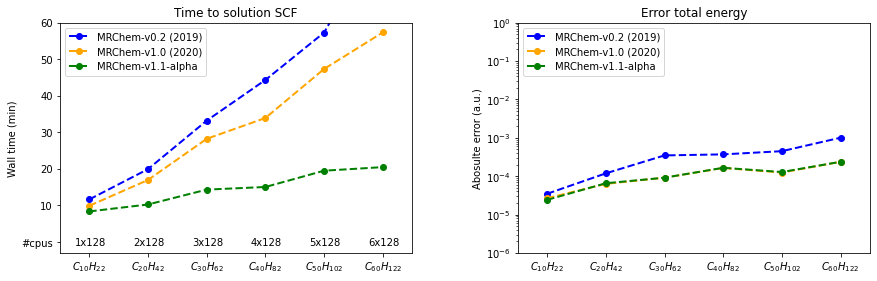

In [3]:
v02_frame = pd.read_csv("alkane/alkane.csv", index_col=[0,1])
v02_series = v02_frame.loc[:,'v0.2',:]

v10_frame = pd.read_csv("alkane/alkane.csv", index_col=[0,1])
v10_series = v10_frame.loc[:,'v1.0',:]

v11_frame = pd.read_csv("alkane/alkane.csv", index_col=[0,1])
v11_series = v11_frame.loc[:,'v1.1',:]

ref_frame = pd.read_csv("alkane/alkane-ref.csv", index_col=[0])
ref_series = ref_frame.loc[:]

idx = np.arange(1, 7)
mol = ['$C_{10}H_{22}$','$C_{20}H_{42}$','$C_{30}H_{62}$','$C_{40}H_{82}$','$C_{50}H_{102}$','$C_{60}H_{122}$']

plt.subplot(121)
plt.title('Time to solution SCF')
plt.plot(idx, v02_series['wall time']/60, c='blue', lw=2, linestyle='--', marker='o', label='MRChem-v0.2 (2019)')
plt.plot(idx, v10_series['wall time']/60, c='orange', lw=2, linestyle='--', marker='o', label='MRChem-v1.0 (2020)')
plt.plot(idx, v11_series['wall time']/60, c='green', lw=2, linestyle='--', marker='o', label='MRChem-v1.1-alpha')
plt.legend(loc='upper left')
plt.xlim(0.5, 6.5)
plt.xticks(idx, mol)
plt.ylim(-3, 60)
plt.yticks([ 0, 10, 20, 30, 40, 50, 60], ['#cpus', 10, 20, 30, 40, 50, 60])
plt.ylabel('Wall time (min)')

for i, txt in enumerate(idx):
    plt.annotate(str(txt)+"x128", (idx[i]-0.25, -1))

plt.subplot(122)
plt.title('Error total energy')
plt.plot(idx, abs(v02_series['SCF energy']-ref_series['SCF energy']), c='blue', lw=2, linestyle='--', marker='o', label='MRChem-v0.2 (2019)')
plt.plot(idx, abs(v10_series['SCF energy']-ref_series['SCF energy']), c='orange', lw=2, linestyle='--', marker='o', label='MRChem-v1.0 (2020)')
plt.plot(idx, abs(v11_series['SCF energy']-ref_series['SCF energy']), c='green', lw=2, linestyle='--', marker='o', label='MRChem-v1.1-alpha')
plt.legend(loc='upper left')
plt.xlim(0.5, 6.5)
plt.xticks(idx, mol)
plt.yscale('log')
plt.ylim(1.0e-6, 1.0e-0)
plt.ylabel('Abosulte error (a.u.)')

plt.subplots_adjust(top=0.9, bottom=0.1, right=2, wspace=.30)
plt.show()